#CDIA:::AAI - Greedy Best-First Search Methods-- SHORTEST PATH PROBLEM

Ibai Laña

In this notebook we will write a generalized version of Greedy Best First Search methods that can work with any problem once it is formulated. Then, the key of the solution will be generating proper problem formulations and the proper heuristic function.


## Frontier operation Functions
In GBFS methods the extraction is not based on their arrival to the queue order, but on the similarity to the heuristic function.



## PROBLEM FORMULATION
The problem was formulated as a Python class, with the actions, restrictions and functions integrated and always the same name, so they can be re-coded for different problems and the search methods work the same. We start creating the class for River crossing problem. Creating other problems will only require changing some parts of this class.

In this NB we will follow with SPP


In [ ]:
import numpy as np
class spp ():
    #attributes of the class are empty
    name = ""
    initial_state = {}
    goal_state = {}
    actions = []


    def __init__(self): ## init method is the constructor.
        self.name ="SPP"
        self.initial_state = "Arad"
        self.goal_state = "Bucharest"
        self.actions=["Arad", "Bucharest", "Craiova", "Dobreta", "Eforie",
                      "Fagaras", "Giurgiu", "Hirsova", "Iasi", "Lugoj",
                      "Mehadia", "Neamt", "Oradea", "Pitesti", "RimnicuVilcea",
                      "Sibiu", "Timisoara", "Urziceni", "Vaslui", "Zerind"]

        self.connections={
                "Arad":{"actions":{"Zerind": 75,"Sibiu": 140,"Timisoara": 118},
								"air_distance_to_bucharest": 366},
                "Bucharest":{"actions":{"Fagaras": 211,"Giurgiu": 90,"Pitesti": 101,"Urziceni": 85},
								"air_distance_to_bucharest": 0},
                "Craiova":{"actions":{"Dobreta": 120,"Pitesti": 138,"RimnicuVilcea": 146},
								"air_distance_to_bucharest": 160},
                "Dobreta":{"actions":{"Mehadia": 75,"Craiova": 120},
								"air_distance_to_bucharest": 242},
                "Eforie":{"actions":{"Hirsova": 86},
								"air_distance_to_bucharest": 161},
                "Fagaras":{"actions":{"Sibiu": 99,"Bucharest": 211},
								"air_distance_to_bucharest": 178},
                "Giurgiu":{"actions":{"Bucharest": 90},
								"air_distance_to_bucharest": 77},
                "Hirsova":{"actions":{"Eforie": 86,"Urziceni": 98},
								"air_distance_to_bucharest": 151},
                "Iasi":{"actions":{"Neamt": 87,"Vaslui": 92},
								"air_distance_to_bucharest": 226},
                "Lugoj":{"actions":{"Timisoara": 111,"Mehadia": 70},
								"air_distance_to_bucharest": 244},
                "Mehadia":{"actions":{"Lugoj": 70,"Dobreta": 75},
								"air_distance_to_bucharest": 241},
                "Neamt":{"actions":{"Iasi": 87},
								"air_distance_to_bucharest": 234},
                "Oradea":{"actions":{"Sibiu": 151,"Zerind": 71},
								"air_distance_to_bucharest": 380},
                "Pitesti":{"actions":{"Craiova": 138,"Bucharest": 101,"RimnicuVilcea": 97},
								"air_distance_to_bucharest": 98},
                "RimnicuVilcea":{"actions":{"Craiova": 146,"Pitesti": 97,"Sibiu": 80},
								"air_distance_to_bucharest": 193},
                "Sibiu":{"actions":{"Oradea": 151,"Arad": 140,"Fagaras": 99,"RimnicuVilcea": 80},
								"air_distance_to_bucharest": 253},
                "Timisoara":{"actions":{"Arad": 118,"Lugoj": 111},
								"air_distance_to_bucharest": 329},
                "Urziceni":{"actions":{"Hirsova": 98,"Bucharest": 85,"Vaslui": 142},
								"air_distance_to_bucharest": 80},
                "Vaslui":{"actions":{"Iasi": 92,"Urziceni": 142},
								"air_distance_to_bucharest": 199},
                "Zerind":{"actions":{"Arad": 75,"Oradea": 71},
								"air_distance_to_bucharest": 374}}


    def is_final_state(self, state):
        return state == self.goal_state

    #####
    def is_applicable (self, state, action):
        return action in self.connections[state]["actions"].keys()

    # moving to another city results in being in this city.
    def effect (self, state, action):
        return action


  ## NOW COST AND EVALUATION ARE RELEVANT.
  ## EVALUATION IS THE HEURISTIC FUNCTION THAT WILL SAY HOW SIMILAR IS A SOLUTION TO FINAL ONE.
  ### in this case COST is path cost
    def get_cost(self, action, state):
        #the distance to the city is encoded in the connections dict.
        return self.connections[state]["actions"][action]

  ### but the evaluation should be some function that tells us how different is the solution

    def get_evaluation (self, state):
      # we don't know the real distance, so we use a straight distance table.
      return self.connections[state]["air_distance_to_bucharest"]


In [ ]:
spproblem = spp()
print(spproblem.initial_state)

print (spproblem.get_evaluation(spproblem.initial_state))
print (spproblem.get_evaluation(spproblem.goal_state))

Arad
366
0


# Expansion Function
Expansion function is the same as before


It receives the problem, with the functions and actions, and a NODE, which includes the following:

* state	(current state)
* parent node (parent node, starts with empty)
* actions (list of actions that led here)
* cost (starting in 0)
* depth (starting in 0)
* evaluation <----- h(n)





In [ ]:
# instead of updating the frontier, the expand function only creates a list of child of possible nodes given a current node
# it does not receive states, but NODES, dictionaries that include other information besides state
def expand (node, problem):
    new_nodes = []
    possible_actions = problem.actions
    for action in possible_actions:
        if problem.is_applicable(node["state"], action):
            new_state= problem.effect (node["state"], action)
            new_node = {}
            new_node["state"]=new_state
            new_node["parent_node"]=node
            new_node["actions"]=node["actions"] + [action]
            new_node["cost"]=node["cost"] + problem.get_cost(action, node["state"])
            new_node["depth"]=node["depth"]+1
            new_node["evaluation"]=problem.get_evaluation(new_state)
            new_nodes.append (new_node)
    return new_nodes

# UNINFORMED SEARCH METHODS


## BFS - Breadth First Search

```
1. Make a node with the initial problem state
2. Insert node into the frontier data structure
3. WHILE final state not found AND frontier is not empty DO
  3.1 Remove first node from the frontier
  3.2 IF node contains final state THEN final state found
  3.3 IF node doesn’t contain final state THEN
     3.3.1 EXPAND node’s state
     3.3.2 Insert successor nodes into frontier
4. IF final state found THEN
  4.1  RETURN sequence of actions found
5. ELSE  “solution not found”
```



In [ ]:
def BFS(problem):
    # result dictionary
    result = {"method":"BFS", "final_state":[], "status":"No nodes in the frontier. No solution possible.",
             "max_frontier":0, "max_depth":0, "iterations":0}

    # 1. problem definition
    # problem = Problem()
    initial_node={"state":problem.initial_state, "parent_node":{}, "actions":[], "cost":0, "depth":0, "evaluation":1}
    frontier = []

     # 2. add node to frontier
    frontier.append(initial_node)

    # 3. start exploring and expanding the frontier
    iterations=1
    while len (frontier)>0: #if we have elements in the frontier...
         # 3.1. get first element of frontier and delete it
        node = frontier[0]


        frontier = frontier[1:]
        # 3.2 check if it is final state:
        if problem.is_final_state (node["state"]):
            result["status"]="Solution Found."
            break #we end while. state will remain this last state computed, and sequence of actions will have all states.

        # 3.3 if it is not final, expand and add to the frontier
        new_nodes = expand(node, problem)
        for n in new_nodes:
            frontier.append(n)

        # we compute the maximum size of frontier: the previous one or the current if it is bigger
        result["max_frontier"]=max(result["max_frontier"],len (frontier))
         # we compute the maximum depth: the previous one or the current if it is bigger
        result["max_depth"]=max(result["max_depth"], node["depth"])
         # we update the iterations count
        result["iterations"]= iterations

        iterations+=1
      #loop keeps running until no more nodes available or final state obtained

    result["final_state"] = node
    return(result)





## BFS-g

In [ ]:
def BFS_g(problem):
    # result dictionary
    result = {"method":"BFS_g", "final_state":[], "status":"No nodes in the frontier. No solution possible.",
             "max_frontier":0, "max_depth":0, "iterations":0}

    # 1. problem definition
    initial_node={"state":problem.initial_state, "parent_node":{}, "actions":[], "cost":0, "depth":0, "evaluation":1}
    frontier = []

    ####
    expanded = []

     # 2. add node to frontier
    frontier.append(initial_node)

    # 3. start exploring and expanding the frontier
    iterations=1
    while len (frontier)>0: #if we have elements in the frontier...
         # 3.1. get first element of frontier and delete it
        node = frontier[0]
        frontier = frontier[1:]

        #add to expanded--> we add the state, as the rest of fields will be different
        expanded.append(node["state"])

        # 3.2 check if it is final state:
        if problem.is_final_state (node["state"]):
            result["status"]="Solution Found."
            break #we end while. state will remain this last state computed, and sequence of actions will have all states.

        # 3.3 if it is not final, expand and add to the frontier
        new_nodes = expand(node, problem)
        for n in new_nodes:
            # check if it is expanded before adding to frontier
            if not np.any ([np.all(n["state"]== e) for e in expanded]):
             ##### CHANGE THE CONDITION TO FIT ALL SIZES ARRAYS::
             # if the state of N is not any of the elements in expanded, add to the frontier
            #if n["state"] not in expanded:
                frontier.append(n)

        # we compute the maximum size of frontier: the previous one or the current if it is bigger
        result["max_frontier"]=max(result["max_frontier"],len (frontier))
         # we compute the maximum depth: the previous one or the current if it is bigger
        result["max_depth"]=max(result["max_depth"], node["depth"])
         # we update the iterations count
        result["iterations"]= iterations

        iterations+=1
      #loop keeps running until no more nodes available or final state obtained

    result["final_state"] = node
    return(result)

## IDS

In [ ]:
def IDS(problem, depth_limit, iteration_limit):
    # result dictionary
    result = {"method":"IDS"+str(depth_limit), "final_state":[], "status":"No nodes in the frontier. No solution possible.",
             "max_frontier":0, "max_depth":0, "iterations":0}

    # 1. problem definition
    initial_node={"state":problem.initial_state, "parent_node":{}, "actions":[], "cost":0, "depth":0, "evaluation":1}
    frontier = []

     # 2. add node to frontier
    frontier.append(initial_node)

    # 3. start exploring and expanding the frontier
    iterations=1

    # we add a control of the accepted max depth, starting with 1:
    current_max_depth=1

    #change the loop condition, now we have to control the end of the loop inside it
    while True:
        #if the len is 0, we have reached to the end of the depth. We start again with an increased max depth
        if len (frontier)==0:
            if current_max_depth<depth_limit:
                current_max_depth+=1
                node ={"state":problem.initial_state, "parent_node":{}, "actions":[], "cost":0, "depth":0, "evaluation":1}
                frontier.append(node)
            else:
                result["status"]= "No nodes in the frontier. No solution possible."
                break

        #control if we have reached the iteration limit, stop
        if iterations>iteration_limit:
            result["status"] = "Maximum number of iterations reached"
            break

         # 3.1. get LAST element of frontier and delete it
        node = frontier[-1]
        frontier = frontier[:-1]

        # 3.2 check if it is final state:
        if problem.is_final_state (node["state"]):
            result["status"]="Solution Found."
            break #we end while. state will remain this last state computed, and sequence of actions will have all states.

        # 3.3 if it is not final, expand and add to the frontier
        new_nodes = expand(node, problem)
        for n in new_nodes:
            ##### WE ONLY APPEND IF DEPTH <= CURRENT MAX DEPTH
            if n["depth"]<=current_max_depth:
                frontier.append(n)
            #in other case node is not appended, ending the loop

        # we compute the maximum size of frontier: the previous one or the current if it is bigger
        result["max_frontier"]=max(result["max_frontier"],len (frontier))
         # we compute the maximum depth: the previous one or the current if it is bigger
        result["max_depth"]=max(result["max_depth"], node["depth"])
         # we update the iterations count
        result["iterations"]= iterations

        iterations+=1
      #loop keeps running until no more nodes available or final state obtained

    result["final_state"] = node
    return(result)

## IDS_g

In [ ]:
def IDS_g(problem, depth_limit, iteration_limit):
    # result dictionary
    result = {"method":"IDS_g-"+str(depth_limit), "final_state":[], "status":"No nodes in the frontier. No solution possible.",
             "max_frontier":0, "max_depth":0, "iterations":0}

    # 1. problem definition
    initial_node={"state":problem.initial_state, "parent_node":{}, "actions":[], "cost":0, "depth":0, "evaluation":1}
    frontier = []

    ####
    expanded = []

     # 2. add node to frontier
    frontier.append(initial_node)

    # 3. start exploring and expanding the frontier
    iterations=1
     # we add a control of the accepted max depth, starting with 1:
    current_max_depth=1

    #change the loop condition, now we have to control the end of the loop inside it
    while True:
        #if the len is 0, we have reached to the end of the depth. We start again with an increased max depth
        if len (frontier)==0:
            if current_max_depth<depth_limit:
                current_max_depth+=1
                node ={"state":problem.initial_state, "parent_node":{}, "actions":[], "cost":0, "depth":0, "evaluation":1}
                frontier.append(node)
                expanded = []
            else:
                result["status"]= "No nodes in the frontier. No solution possible."
                break
       #before doing anything, if we have reached the iteration limit, stop
        if iterations>iteration_limit:
            result["status"] = "Maximum number of iterations reached"
            break
         # 3.1. get first element of frontier and delete it
        node = frontier[-1]
        frontier = frontier[:-1]

        #add to expanded--> we add the state, as the rest of fields will be different
        expanded.append(node["state"])

        # 3.2 check if it is final state:
        if problem.is_final_state (node["state"]):
            result["status"]="Solution Found."
            break #we end while. state will remain this last state computed, and sequence of actions will have all states.

        # 3.3 if it is not final, expand and add to the frontier
        new_nodes = expand(node, problem)
        for n in new_nodes:
            # check if it is expanded before adding to frontier
            if not np.any ([np.all(n["state"]== e) for e in expanded]):
            #if n["state"] not in expanded:
                if n["depth"]<=current_max_depth:
                    frontier.append(n)

        # we compute the maximum size of frontier: the previous one or the current if it is bigger
        result["max_frontier"]=max(result["max_frontier"],len (frontier))
         # we compute the maximum depth: the previous one or the current if it is bigger
        result["max_depth"]=max(result["max_depth"], node["depth"])
         # we update the iterations count
        result["iterations"]= iterations

        iterations+=1
      #loop keeps running until no more nodes available or final state obtained

    result["final_state"] = node
    return(result)

# INFORMED SEARCH




## GBFS: GREEDY BEST FIRST SEARCH

The algorithm is equal to BFS, but in this case we add a new step, sorting the frontier in order to get the most similar node the first to be expanded.

Besides, we need to add a control of iterations, as with other methods, as GBFS is not complete and might enter an infinite loop
```
1. Make a node with the initial problem state
2. Insert node into the frontier data structure
3. WHILE final state not found AND frontier is not empty DO
  3.1 Remove first node from the frontier
  3.2 IF node contains final state THEN final state found
  3.3 IF node doesn’t contain final state THEN
     3.3.1 EXPAND node’s state
     3.3.2 Insert successor nodes into frontier
     3.3.3 Sort frontier in ascending order of f(n)
4. IF final state found THEN
  4.1  RETURN sequence of actions found
5. ELSE  “solution not found”
```


In [ ]:
def GBFS(problem, iteration_limit):
    # result dictionary
    result = {"method":"GBFS", "final_state":[], "status":"No nodes in the frontier. No solution possible.",
             "max_frontier":0, "max_depth":0, "iterations":0}

    # 1. problem definition
    # problem = Problem()
#####---->>>>>>> initial evaluation is obtained from the function
    initial_node={"state":problem.initial_state, "parent_node":{}, "actions":[], "cost":0, "depth":0, "evaluation":problem.get_evaluation(problem.initial_state)}
    frontier = []

     # 2. add node to frontier
    frontier.append(initial_node)

    # 3. start exploring and expanding the frontier
    iterations=1
    while len (frontier)>0: #if we have elements in the frontier...

######---->>>>>>>> iteration control
        #control if we have reached the iteration limit, stop
        if iterations>iteration_limit:
            result["status"] = "Maximum number of iterations reached"
            break

         # 3.1. get first element of frontier and delete it
        node = frontier[0]


        frontier = frontier[1:]
        # 3.2 check if it is final state:
        if problem.is_final_state (node["state"]):
            result["status"]="Solution Found."
            break #we end while. state will remain this last state computed, and sequence of actions will have all states.

        # 3.3 if it is not final, expand and add to the frontier
        new_nodes = expand(node, problem)
        for n in new_nodes:
            frontier.append(n)

################# SORTING THE FRONTIER
        # sorting by ascending order this will lead to
        frontier = sorted(frontier, key=lambda field: field['evaluation'])

        # we compute the maximum size of frontier: the previous one or the current if it is bigger
        result["max_frontier"]=max(result["max_frontier"],len (frontier))
         # we compute the maximum depth: the previous one or the current if it is bigger
        result["max_depth"]=max(result["max_depth"], node["depth"])
         # we update the iterations count
        result["iterations"]= iterations

        iterations+=1
      #loop keeps running until no more nodes available or final state obtained

    result["final_state"] = node
    return(result)

## GBFS-Graph

In [ ]:
def GBFS_g(problem, iteration_limit):
    # result dictionary
    result = {"method":"GBFS", "final_state":[], "status":"No nodes in the frontier. No solution possible.",
             "max_frontier":0, "max_depth":0, "iterations":0}

    # 1. problem definition
    # problem = Problem()
    initial_node={"state":problem.initial_state, "parent_node":{}, "actions":[], "cost":0, "depth":0, "evaluation":problem.get_evaluation(problem.initial_state)}
    frontier = []

####---->>> EXPANDED NODES LIST
    expanded = []
     # 2. add node to frontier
    frontier.append(initial_node)

    # 3. start exploring and expanding the frontier
    iterations=1
    while len (frontier)>0: #if we have elements in the frontier...
       #control if we have reached the iteration limit, stop
        if iterations>iteration_limit:
            result["status"] = "Maximum number of iterations reached"
            break

         # 3.1. get first element of frontier and delete it
        node = frontier[0]


        frontier = frontier[1:]
        # 3.2 check if it is final state:
        if problem.is_final_state (node["state"]):
            result["status"]="Solution Found."
            break #we end while. state will remain this last state computed, and sequence of actions will have all states.

        # 3.3 if it is not final, expand and add to the frontier
        new_nodes = expand(node, problem)
        for n in new_nodes:
######----->>>>>>> check if it is expanded before adding to frontier
            if not np.any ([np.all(n["state"]== e) for e in expanded]):
              frontier.append(n)


        # sorting by ascending order this will lead to
        frontier = sorted(frontier, key=lambda field: field['evaluation'])

        # we compute the maximum size of frontier: the previous one or the current if it is bigger
        result["max_frontier"]=max(result["max_frontier"],len (frontier))
         # we compute the maximum depth: the previous one or the current if it is bigger
        result["max_depth"]=max(result["max_depth"], node["depth"])
         # we update the iterations count
        result["iterations"]= iterations

        iterations+=1
      #loop keeps running until no more nodes available or final state obtained

    result["final_state"] = node
    return(result)



## A*

A* will have a similar behavior to GBFS, in fact, it is essentially the same code. However the expansion function has a slight change:




```
A* EXPANSION

1. Initialize Successors to an empty list.
2. FOR EACH applicable action on state of current node DO
  2.1 Make a new successor node and generate successor state
  2.2 Successor’s state = successor state
  2.3 Successor’s action = applicable action
  2.4 Successor’s parent node = current node
  2.5 Successor’s path-cost = current path cost + action cost
  2.6 f(successor) = g(successor) + h(successor)
  2.7 Successor’s depth = current depth + 1
  2.8 Add successor node to Successors
3. RETURN Successors


```


```
A*


Make a node with the initial problem state
Insert node into the frontier data structure
WHILE final state not found AND frontier is not empty DO
  3.1 Remove first node from the frontier
  3.2 IF node contains final state THEN final state found
  3.3 IF node doesn’t contain final state THEN
     3.3.1 EXPAND node’s state
     3.3.2 Insert successor nodes into frontier
     3.3.3 Sort frontier in ascending order of f(n)---> IS THE SAME ONCE THE FRONTIER IS COMPUTED
IF final state found THEN
  4.1  RETURN sequence of actions found
ELSE  “solution not found”

```



In [ ]:
def expand_a_star (node, problem):
    new_nodes = []
    possible_actions = problem.actions
    for action in possible_actions:
        if problem.is_applicable(node["state"], action):
            new_state= problem.effect (node["state"], action)
            new_node = {}
            new_node["state"]=new_state
            new_node["parent_node"]=node
            new_node["actions"]=node["actions"] + [action]
            new_node["cost"]=node["cost"] + problem.get_cost(action, node["state"])
            new_node["depth"]=node["depth"]+1
            ##### REWRITE THE EVALUATION
            new_node["evaluation"]=  new_node["cost"] + problem.get_evaluation(new_state)
            new_nodes.append (new_node)
    return new_nodes



In [ ]:
def A_star(problem, iteration_limit):
    # result dictionary
    result = {"method":"A*", "final_state":[], "status":"No nodes in the frontier. No solution possible.",
             "max_frontier":0, "max_depth":0, "iterations":0}

    # 1. problem definition
    # problem = Problem()
    initial_node={"state":problem.initial_state, "parent_node":{}, "actions":[], "cost":0, "depth":0, "evaluation":problem.get_evaluation(problem.initial_state)}
    frontier = []

     # 2. add node to frontier
    frontier.append(initial_node)

    # 3. start exploring and expanding the frontier
    iterations=1
    while len (frontier)>0: #if we have elements in the frontier...

        #control if we have reached the iteration limit, stop
        if iterations>iteration_limit:
            result["status"] = "Maximum number of iterations reached"
            break

         # 3.1. get first element of frontier and delete it
        node = frontier[0]


        frontier = frontier[1:]
        # 3.2 check if it is final state:
        if problem.is_final_state (node["state"]):
            result["status"]="Solution Found."
            break #we end while. state will remain this last state computed, and sequence of actions will have all states.

        # 3.3 if it is not final, expand and add to the frontier

###--->>>>        #### CALL THE NEW FUNCTION

        new_nodes = expand_a_star(node, problem)
        for n in new_nodes:
            frontier.append(n)

        ################# SORTING THE FRONTIER
        # sorting by ascending order this will lead to
        frontier = sorted(frontier, key=lambda field: field['evaluation'])

        # we compute the maximum size of frontier: the previous one or the current if it is bigger
        result["max_frontier"]=max(result["max_frontier"],len (frontier))
         # we compute the maximum depth: the previous one or the current if it is bigger
        result["max_depth"]=max(result["max_depth"], node["depth"])
         # we update the iterations count
        result["iterations"]= iterations

        iterations+=1
      #loop keeps running until no more nodes available or final state obtained

    result["final_state"] = node
    return(result)

# COMPARISON


In [ ]:
problem = spp()
def print_results (res):
  print ("METHOD: {} \n Final_state: {} \n Final Status: {} \n Maximum frontier size: {}  \n Maximum Depth: {} \n Iterations reached: {}  \n COST:{}".format(res["method"], res["final_state"]["actions"], res["status"], res["max_frontier"], res["max_depth"], res["iterations"],res["final_state"]["cost"]))


NameError: ignored

In [ ]:
bfs_res = BFS(problem)
print_results (bfs_res)

METHOD: BFS 
 Final_state: ['Sibiu', 'Fagaras', 'Bucharest'] 
 Final Status: Solution Found. 
 Maximum frontier size: 25  
 Maximum Depth: 3 
 Iterations reached: 15  
 COST:450


In [ ]:
bfsg_res = BFS_g(problem)
print_results (bfsg_res)

METHOD: BFS_g 
 Final_state: ['Sibiu', 'Fagaras', 'Bucharest'] 
 Final Status: Solution Found. 
 Maximum frontier size: 5  
 Maximum Depth: 2 
 Iterations reached: 9  
 COST:450


In [ ]:
ids_res     = IDS(problem, depth_limit = 8, iteration_limit = 1000)
print_results (ids_res )

METHOD: IDS8 
 Final_state: ['Sibiu', 'Fagaras', 'Bucharest'] 
 Final Status: Solution Found. 
 Maximum frontier size: 6  
 Maximum Depth: 3 
 Iterations reached: 43  
 COST:450


In [ ]:
idsg_res  = IDS_g(problem, depth_limit = 8, iteration_limit = 100)
print_results (idsg_res )
print (idsg_res)

METHOD: IDS_g-8 
 Final_state: ['Sibiu', 'Fagaras', 'Bucharest'] 
 Final Status: Solution Found. 
 Maximum frontier size: 3  
 Maximum Depth: 3 
 Iterations reached: 24  
 COST:450
{'method': 'IDS_g-8', 'final_state': {'state': 'Bucharest', 'parent_node': {'state': 'Fagaras', 'parent_node': {'state': 'Sibiu', 'parent_node': {'state': 'Arad', 'parent_node': {}, 'actions': [], 'cost': 0, 'depth': 0, 'evaluation': 1}, 'actions': ['Sibiu'], 'cost': 140, 'depth': 1, 'evaluation': 253}, 'actions': ['Sibiu', 'Fagaras'], 'cost': 239, 'depth': 2, 'evaluation': 178}, 'actions': ['Sibiu', 'Fagaras', 'Bucharest'], 'cost': 450, 'depth': 3, 'evaluation': 0}, 'status': 'Solution Found.', 'max_frontier': 3, 'max_depth': 3, 'iterations': 24}


In [ ]:
gbfs = GBFS(problem, iteration_limit=100)
print_results (gbfs )

METHOD: GBFS 
 Final_state: ['Sibiu', 'Fagaras', 'Bucharest'] 
 Final Status: Solution Found. 
 Maximum frontier size: 7  
 Maximum Depth: 2 
 Iterations reached: 3  
 COST:450


In [ ]:
gbfs_g= GBFS_g(problem, iteration_limit=100)
print_results (gbfs_g )

METHOD: GBFS 
 Final_state: ['Sibiu', 'Fagaras', 'Bucharest'] 
 Final Status: Solution Found. 
 Maximum frontier size: 7  
 Maximum Depth: 2 
 Iterations reached: 3  
 COST:450


In [ ]:
a_star_= A_star(problem, iteration_limit=100)
print_results (a_star_ )

METHOD: A* 
 Final_state: ['Sibiu', 'RimnicuVilcea', 'Pitesti', 'Bucharest'] 
 Final Status: Solution Found. 
 Maximum frontier size: 11  
 Maximum Depth: 3 
 Iterations reached: 5  
 COST:418


# SQUARES

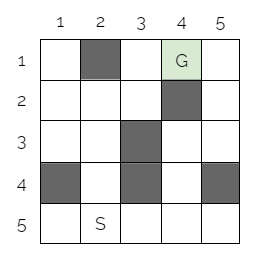

In [ ]:
class square ():
    #attributes of the class are empty
    name = ""
    initial_state = {}
    goal_state = {}
    actions = []
    grid = [[0,1,0,0,0],
            [0,0,0,1,0],
            [0,0,1,0,0],
            [1,0,1,0,1],
            [0,0,0,0,0]]

    def __init__(self): ## init method is the constructor.
        self.name ="squares"
        self.initial_state = {position = [4,1], kye=f...
        self.goal_state = [0,3]
        self.actions=["U","L","D","R"]


    def is_final_state(self, state):
        return state == self.goal_state

    #####
    def is_applicable (self, state, action):
        new_state = self.effect(state, action)
        if new_state != [-1,-1]:
          return  self.grid[new_state[0]][new_state[1]] !=1
        else:
          return False

    # moving to another city results in being in this city.
    def effect (self, state, action):
        new_state=  state.copy()

        if action =="U":
          if state[0]!=0:
            new_state[0] = state[0]-1
          else:
            new_state = [-1,-1]
        elif action =="D":
          if state[0]!=4:
            new_state[0] = state[0]+1
          else:
            new_state = [-1,-1]
        elif action =="L":
          if state[1]!=0:
            new_state[1] = state[1]-1
          else:
            new_state = [-1,-1]
        elif action =="R":
          if state[1]!=4:
            new_state[1] = state[1]+1
          else:
            new_state = [-1,-1]
        return new_state

  ## NOW COST AND EVALUATION ARE RELEVANT.
  ## EVALUATION IS THE HEURISTIC FUNCTION THAT WILL SAY HOW SIMILAR IS A SOLUTION TO FINAL ONE.
  ### in this case COST is path cost
    def get_cost(self, action, state):
        #the distance to the city is encoded in the connections dict.
        return 1

  ### but the evaluation should be some function that tells us how different is the solution
    def euclidean(self, state):
      return np.sqrt((state[0]-self.goal_state[0])**2 + (state[1]-self.goal_state[1])**2)

    def get_evaluation (self, state):
      # we don't know the real distance, so we use a straight distance table.
      return self.euclidean (state)


In [ ]:
problem = square()
def print_results (res):
  print ("METHOD: {} \n Final_state: {} \n Final Status: {} \n Maximum frontier size: {}  \n Maximum Depth: {} \n Iterations reached: {}  \n COST:{}".format(res["method"], res["final_state"]["actions"], res["status"], res["max_frontier"], res["max_depth"], res["iterations"],res["final_state"]["cost"]))
a_star_= A_star(problem, iteration_limit=100)
print_results (a_star_ )

METHOD: A* 
 Final_state: ['U', 'U', 'U', 'R', 'U', 'R'] 
 Final Status: Solution Found. 
 Maximum frontier size: 14  
 Maximum Depth: 5 
 Iterations reached: 10  
 COST:6
